# Digit Recognizer

### 1. Import dependecies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report


### 2. Explore data

In [2]:
data_dir = "data"
logs_dir = "logs"
model_dir = "model"

In [3]:
train_df = pd.read_csv(f'{data_dir}/train.csv')
test_df = pd.read_csv(f'{data_dir}/test.csv')

In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_train = train_df.drop(columns=['label'], axis=1)
y_train = train_df['label']

/var/folders/qk/r2f1t43s12b89hks3k_ktqn80000gn/T/ipykernel_26088/116699738.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=y_train.value_counts().index, y=y_train.value_counts().values, palette="viridis")


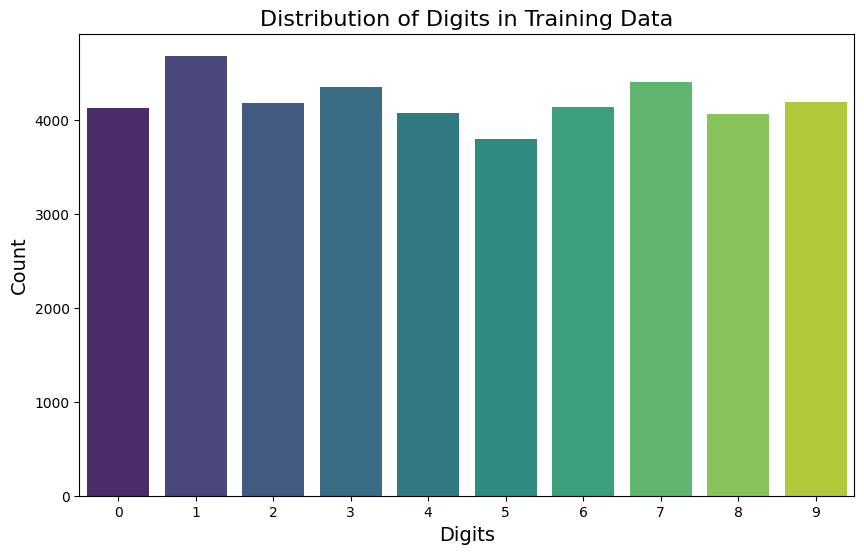

In [7]:
# Create a bar plot with a colorful palette
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=y_train.value_counts().index, y=y_train.value_counts().values, palette="viridis")

# Add labels and title
plt.xlabel('Digits', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Digits in Training Data', fontsize=16)

# Show the plot
plt.show()

In [8]:
y_train.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

### 3. Prepare data

In [9]:
X_train = X_train / 255.0
test_df = test_df / 255.0

In [10]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
X_train.shape

(42000, 784)

In [12]:
# Reshape the data for 3 dimensions
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = test_df.values.reshape(-1, 28, 28, 1)

In [13]:
# Encode the labels to one hot vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)


In [14]:
# set random seed for reproducibility
random_seed = 2


In [15]:
# divide data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=random_seed)

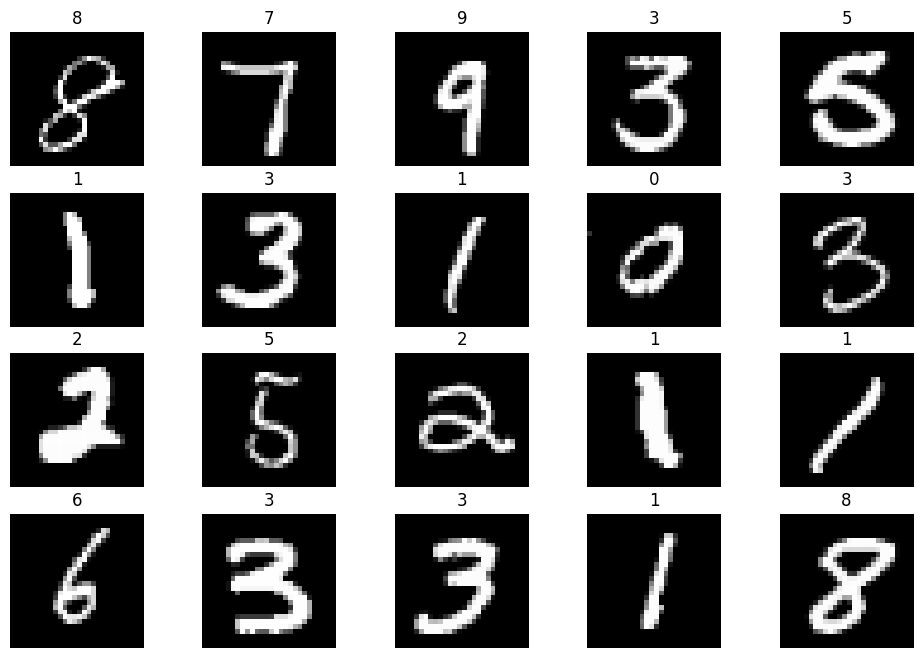

In [16]:
# Show some examples of images
plt.figure(figsize=(12, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train[i][:, :, 0], cmap='gray')
    plt.title(f'{np.argmax(y_train[i])}')
    plt.axis('off')

### 4. Define the CNN model


In [17]:
# Define a model with architecture CNN  
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='Same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), padding='Same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding='Same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding='Same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    # add flatten layer to convert 2D matrix to 1D vector
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    # output layer
    tf.keras.layers.Dense(10, activation='softmax')
])

/Users/antoniocantos/proyectos/digit_recognizer/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 870,634 (3.32 MB)

 Trainable params: 870,634 (3.32 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:

# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir=logs_dir, histogram_freq=1)


# Fit the model and save the logs in the logs directory
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_val, y_val), callbacks=[tensorboard_callback])

Epoch 1/20


591/591 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.8296 - loss: 0.5170 - val_accuracy: 0.9829 - val_loss: 0.0517 - learning_rate: 0.0010
Epoch 2/20
  2/591 ━━━━━━━━━━━━━━━━━━━━ 31s 54ms/step - accuracy: 0.9883 - loss: 0.0257

/Users/antoniocantos/proyectos/digit_recognizer/.venv/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


591/591 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - accuracy: 0.9760 - loss: 0.0757 - val_accuracy: 0.9860 - val_loss: 0.0437 - learning_rate: 0.0010
Epoch 3/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - accuracy: 0.9849 - loss: 0.0475 - val_accuracy: 0.9876 - val_loss: 0.0414 - learning_rate: 0.0010
Epoch 4/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.9882 - loss: 0.0371 - val_accuracy: 0.9890 - val_loss: 0.0336 - learning_rate: 0.0010
Epoch 5/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - accuracy: 0.9899 - loss: 0.0311 - val_accuracy: 0.9910 - val_loss: 0.0336 - learning_rate: 0.0010
Epoch 6/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - accuracy: 0.9918 - loss: 0.0278 - val_accuracy: 0.9907 - val_loss: 0.0337 - learning_rate: 0.0010
Epoch 7/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - accuracy: 0.9931 - loss: 0.0221 - val_accuracy: 0.9914 - val_loss: 0.0333 - learning_rate: 0.0010
Epoch 8/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.9935 - loss: 0.0209

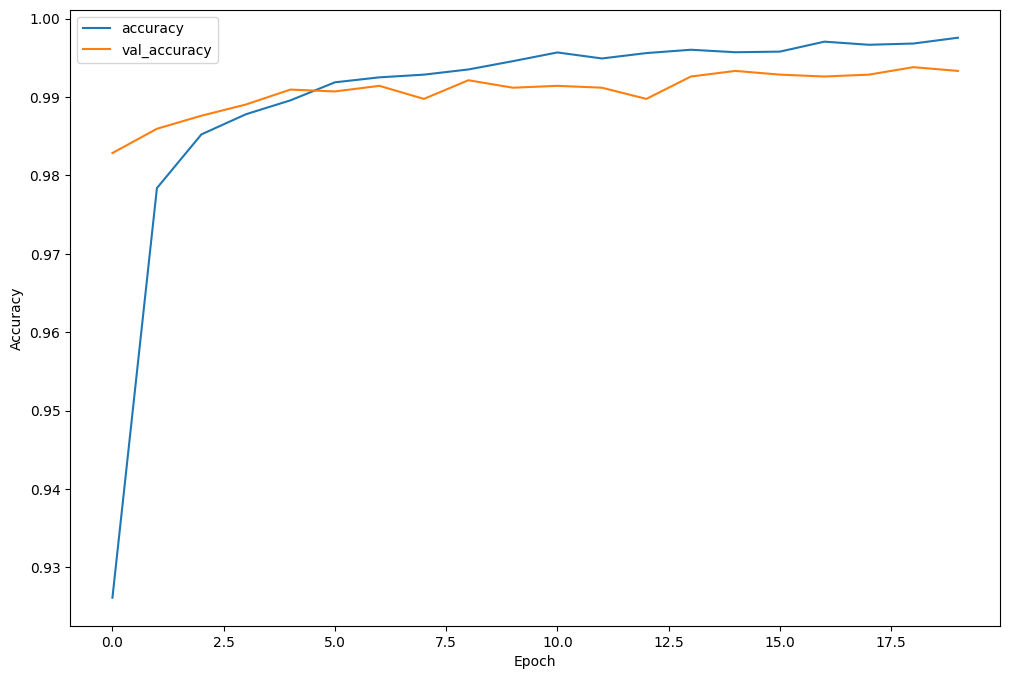

In [21]:
# Show graphics with the history of the training
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


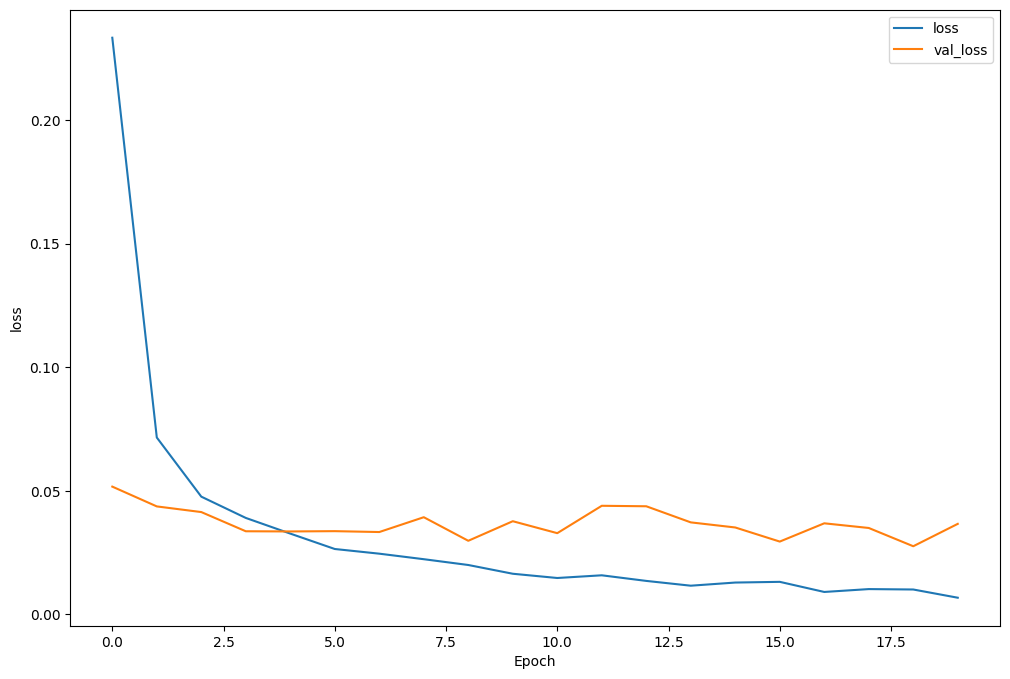

In [22]:

plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()


132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


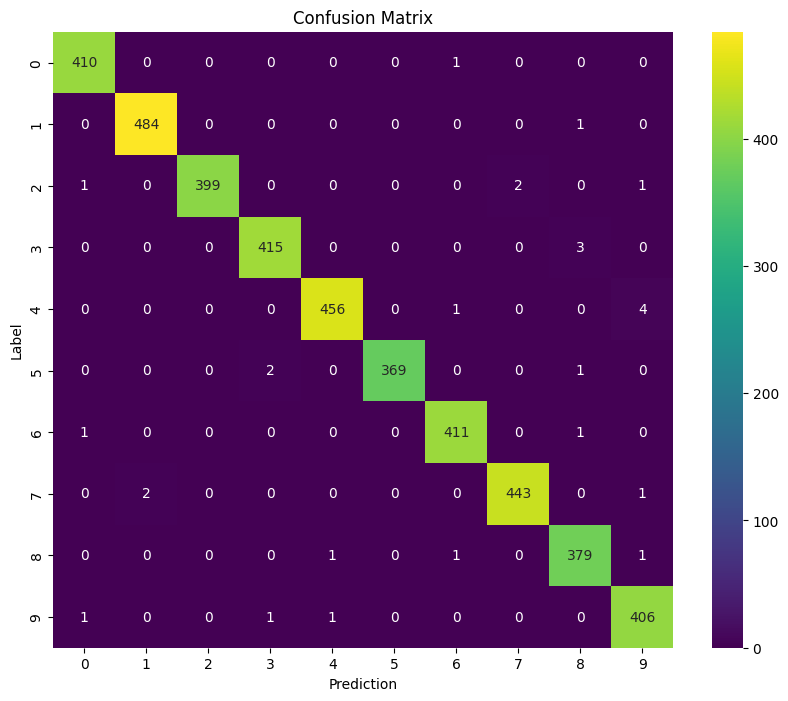

In [23]:
# build a function that plots the confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    # get the confusion matrix
    confusion_matrix = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
    # plot using seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='viridis')
    plt.xlabel('Prediction')
    plt.ylabel('Label')
    plt.title('Confusion Matrix')
    plt.show()


# Predict the test data
y_pred = model.predict(X_val)

# Get the predicted labels
y_pred = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_val,axis = 1)

plot_confusion_matrix(y_true, y_pred)

In [24]:
# get precision, recall and f1-score

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       411
           1       1.00      1.00      1.00       485
           2       1.00      0.99      1.00       403
           3       0.99      0.99      0.99       418
           4       1.00      0.99      0.99       461
           5       1.00      0.99      1.00       372
           6       0.99      1.00      0.99       413
           7       1.00      0.99      0.99       446
           8       0.98      0.99      0.99       382
           9       0.98      0.99      0.99       409

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



In [25]:
# precict the test data
y_pred = model.predict(X_test)

# Get the predicted labels
y_pred = np.argmax(y_pred, axis=1)

# Create a DataFrame with the ImageId and the predicted labels
submission = pd.DataFrame({'ImageId': range(1, len(y_pred) + 1), 'Label': y_pred})

# Save the DataFrame to a csv file
submission.to_csv(f'{data_dir}/submission.csv', index=False)

875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step
